K-means is a popular unsupervised machine learning algorithm that groups similar data points into K clusters. Here's how it works:

1. Choose K (number of clusters)
2. Randomly place K centroids in the data space
3. Repeat until convergence:

Assign each data point to the nearest centroid
Move each centroid to the average position of all points assigned to it

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

1. Read Training Data

Using pandas to read the file

In [2]:
df = pd.read_csv("sample_data/income.csv")
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


Apply Scatter plot to visualize after reading data to check each row

Text(0, 0.5, 'fnlwgt')

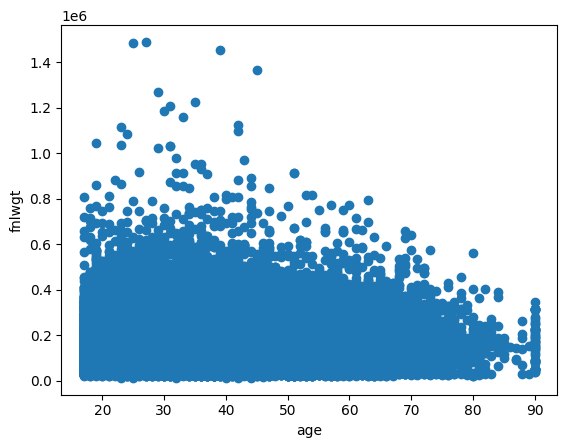

In [5]:
plt.scatter(df.age,df.fnlwgt)
plt.xlabel('age')
plt.ylabel('fnlwgt')

Encode Categorical Values

Not all data can be presented as numbers in our data set. Furthermore, KMeans does not work with textual data therefore the data has to be encoded to numerical values. To elaborate, area and gender features are represented as text fields. We can use label encoders to convert text to numbers:

In [7]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['age','fnlwgt']])
y_predicted

array([2, 2, 0, ..., 1, 2, 0], dtype=int32)

In [8]:
df['cluster']=y_predicted
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level,cluster
0,39,77516,13,2174,0,40,0,2
1,50,83311,13,0,0,13,0,2
2,38,215646,9,0,0,40,0,0
3,53,234721,7,0,0,40,0,0
4,28,338409,13,0,0,40,0,1


In [9]:
km.cluster_centers_

array([[3.84964089e+01, 2.04880901e+05],
       [3.65719608e+01, 3.76633816e+05],
       [3.96846958e+01, 9.31126186e+04]])

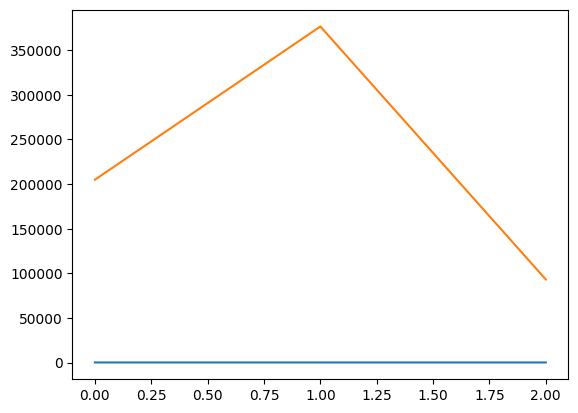

In [10]:
plt.plot(km.cluster_centers_)

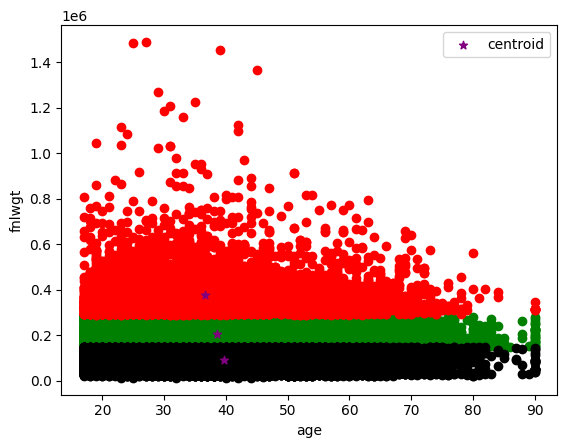

In [12]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.age,df1.fnlwgt,color='green')
plt.scatter(df2.age,df2.fnlwgt,color='red')
plt.scatter(df3.age,df3.fnlwgt,color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('age')
plt.ylabel('fnlwgt')
plt.legend()

In [13]:
scaler = MinMaxScaler()

scaler.fit(df[['fnlwgt']])
df['fnlwgt'] = scaler.transform(df[['fnlwgt']])

scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])

Preprocessing using min max scaler

In [14]:
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level,cluster
0,0.301370,0.044131,13,2174,0,40,0,2
1,0.452055,0.048052,13,0,0,13,0,2
2,0.287671,0.137581,9,0,0,40,0,0
3,0.493151,0.150486,7,0,0,40,0,0
4,0.150685,0.220635,13,0,0,40,0,1


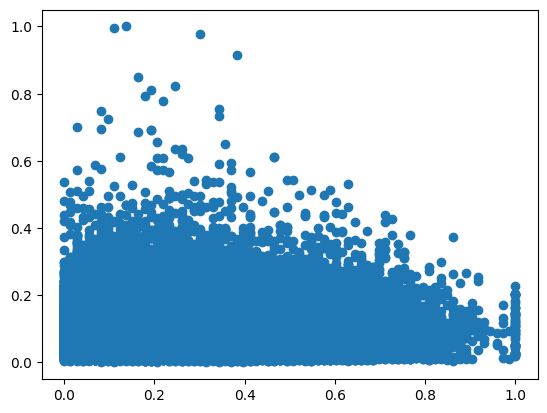

In [15]:
plt.scatter(df.age,df['fnlwgt'])

In [16]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['age','fnlwgt']])
y_predicted

array([2, 0, 2, ..., 2, 2, 2], dtype=int32)

In [17]:
df['cluster']=y_predicted
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level,cluster
0,0.301370,0.044131,13,2174,0,40,0,2
1,0.452055,0.048052,13,0,0,13,0,0
2,0.287671,0.137581,9,0,0,40,0,2
3,0.493151,0.150486,7,0,0,40,0,0
4,0.150685,0.220635,13,0,0,40,0,1


In [18]:
km.cluster_centers_

array([[0.5717602 , 0.11172604],
       [0.11129269, 0.12675083],
       [0.32171867, 0.11813286]])

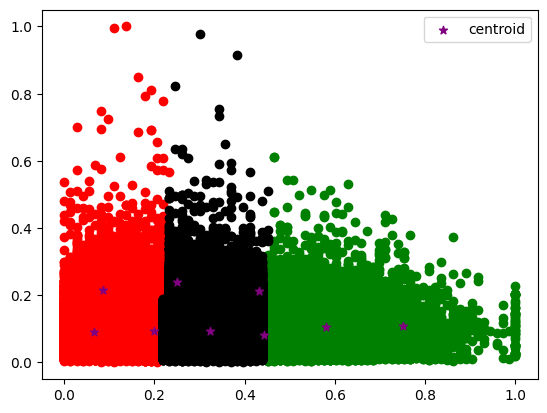

In [23]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.age,df1['fnlwgt'],color='green')
plt.scatter(df2.age,df2['fnlwgt'],color='red')
plt.scatter(df3.age,df3['fnlwgt'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

Elbow Plot

The technique to determine K, the number of clusters, is called the elbow method.``

In [20]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['age','fnlwgt']])
    sse.append(km.inertia_)

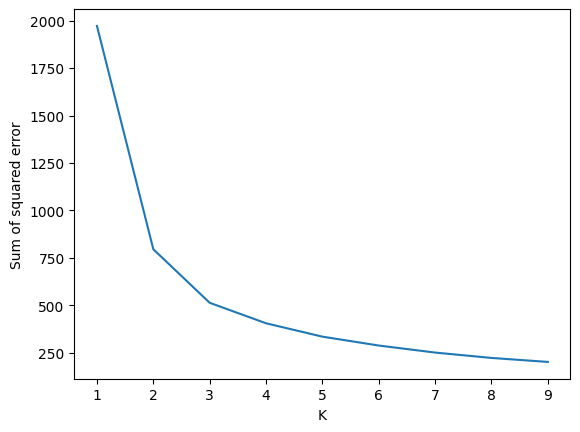

In [21]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)